# Responsi Biomedical Image Processing
### Sayyidan Muhamad Ikhsan
### 20/460160/TK/50749

# Image Filtering pada citra ct-scan otak


In [ ]:
# mengkoneksikan pada google drive
from google.colab import files
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from skimage.metrics import structural_similarity as ssim

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#inisiasi path image
brain1 = "/content/drive/MyDrive/SP Image Processing/Responsi Filtering/brain 1.jpg"
brain2 = "/content/drive/MyDrive/SP Image Processing/Responsi Filtering/brain 2.jpg"
brain3 = "/content/drive/MyDrive/SP Image Processing/Responsi Filtering/brain3.jpg"
brain4 = "/content/drive/MyDrive/SP Image Processing/Responsi Filtering/brain4.jpg"
brain5 = "/content/drive/MyDrive/SP Image Processing/Responsi Filtering/brain5.jpg"

## Average Filter

In [ ]:
#fungsi untuk melakukan konvolusi
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image_conv = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image_conv[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
        return new_image_conv


In [ ]:
# Inisiasi kernel 3x3 average filter
kernel_af = np.ones([3,3], dtype = int)/9

# Inisiasi kernel 3x3 weighted average filter
kernel_waf = np.array([[1,2,1],[2,4,2],[1,2,1]], dtype = int)/16

# Fungsi untuk melakukan konvolusi dan menampilkan hasilnya
def average_filter(input_img):
  # Baca citra yang sudah diunggah pada sistem
  img = cv2.imread(input_img, 0)
  shape = img.shape

  af_img = convolution2d(img,kernel_af)
  waf_img = convolution2d(img,kernel_waf)

  #tampilkan citra
  fig, ax = plt.subplots(1,3, figsize=(30,30))
  ax[0].set_title(f'Citra Original', fontsize = 20)
  ax[0].imshow(abs(img), cmap='gray')

  ax[1].set_title(f'Average Filter', fontsize = 20)
  ax[1].imshow(abs(af_img), cmap='gray')

  ax[2].set_title(f'Weighted Average Filter', fontsize = 20)
  ax[2].imshow(abs(waf_img), cmap='gray');

  #melihat metrik SSIM
  ssim_avg_filter = ssim(cv2.resize(img,shape), cv2.resize(af_img,shape), multichannel=True)
  ssim_weighted_avg = ssim(cv2.resize(img,shape), cv2.resize(waf_img,shape), multichannel=True)

  print("nilai SSIM average filter:" + str(ssim_avg_filter))
  print("nilai SSIM weighted filter:" + str(ssim_weighted_avg))

<ipython-input-34-e8e63f54446b>:28: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_avg_filter = ssim(cv2.resize(img,shape), cv2.resize(af_img,shape), multichannel=True)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
<ipython-input-34-e8e63f54446b>:29: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_weighted_avg = ssim(cv2.resize(img,shape), cv2.resize(waf_img,shape), multichannel=True)


nilai SSIM average filter:0.732643747104711
nilai SSIM weighted filter:0.762562857173169
nilai SSIM average filter:0.8663535915353939
nilai SSIM weighted filter:0.8775611542277979
nilai SSIM average filter:0.8649220868141055
nilai SSIM weighted filter:0.8743849331541933
nilai SSIM average filter:0.8835382417829618
nilai SSIM weighted filter:0.8919609223827168
nilai SSIM average filter:0.8743187342993918
nilai SSIM weighted filter:0.8854930195727935


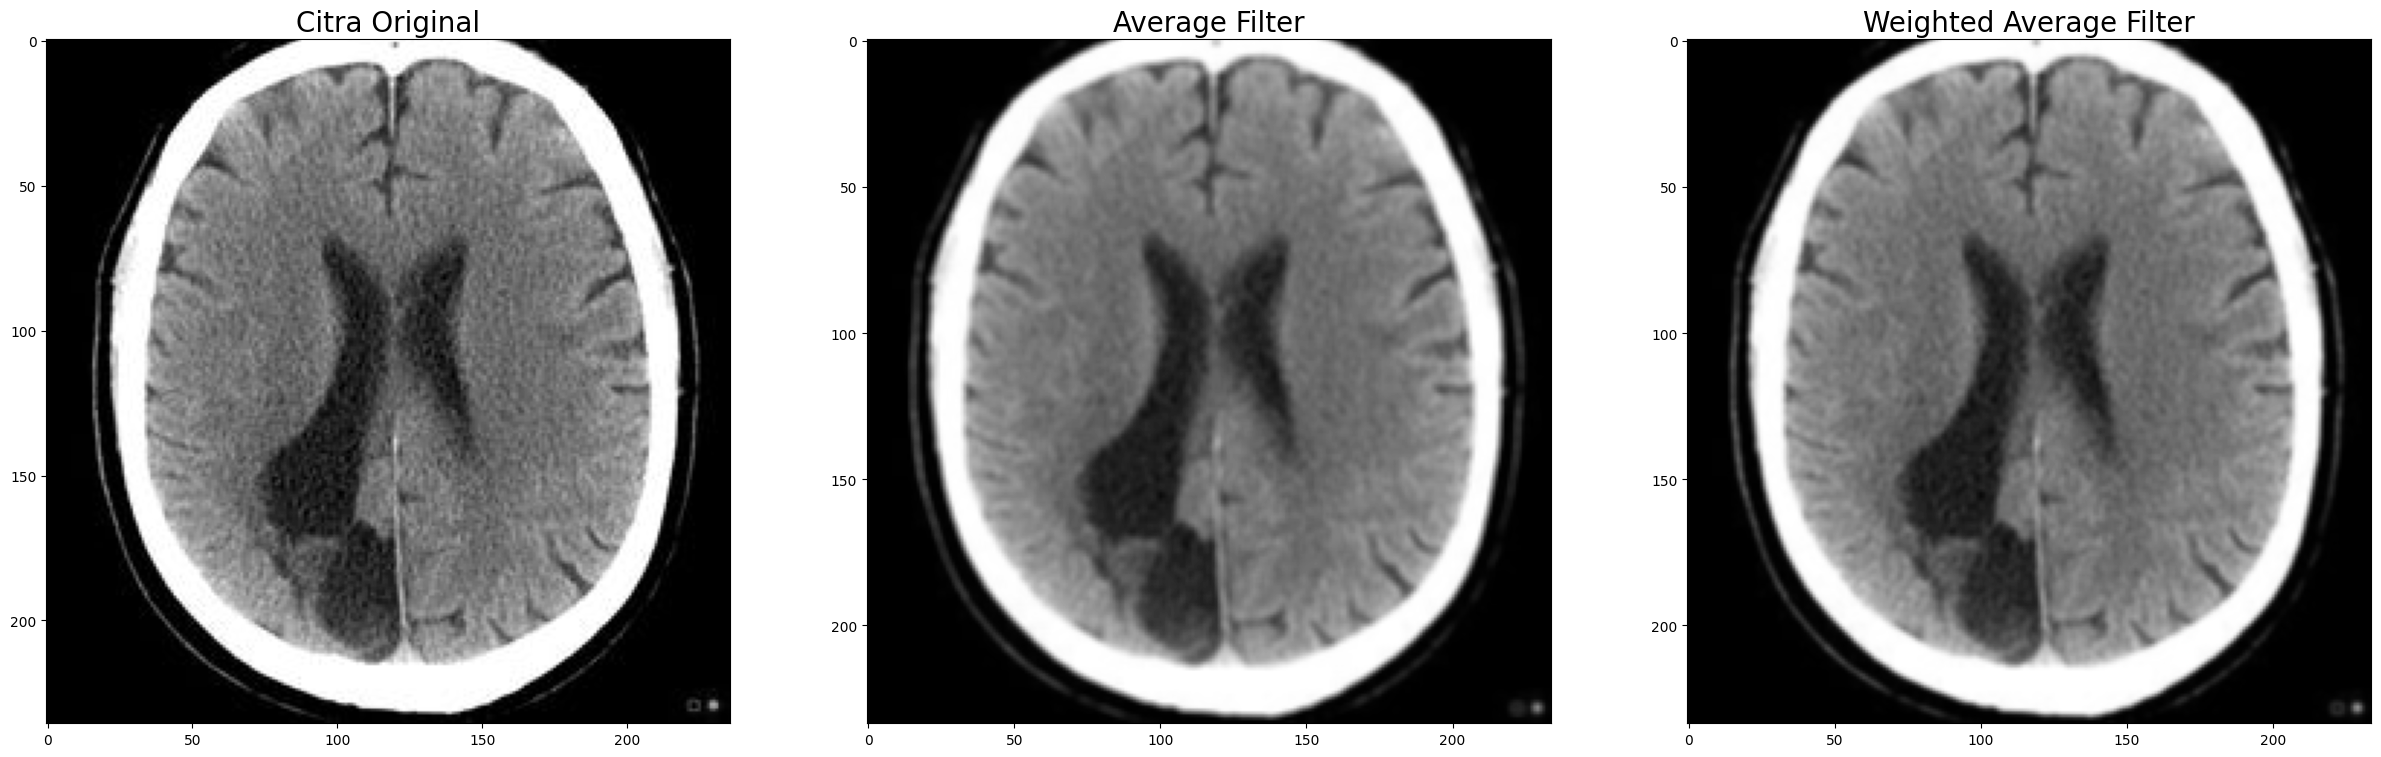

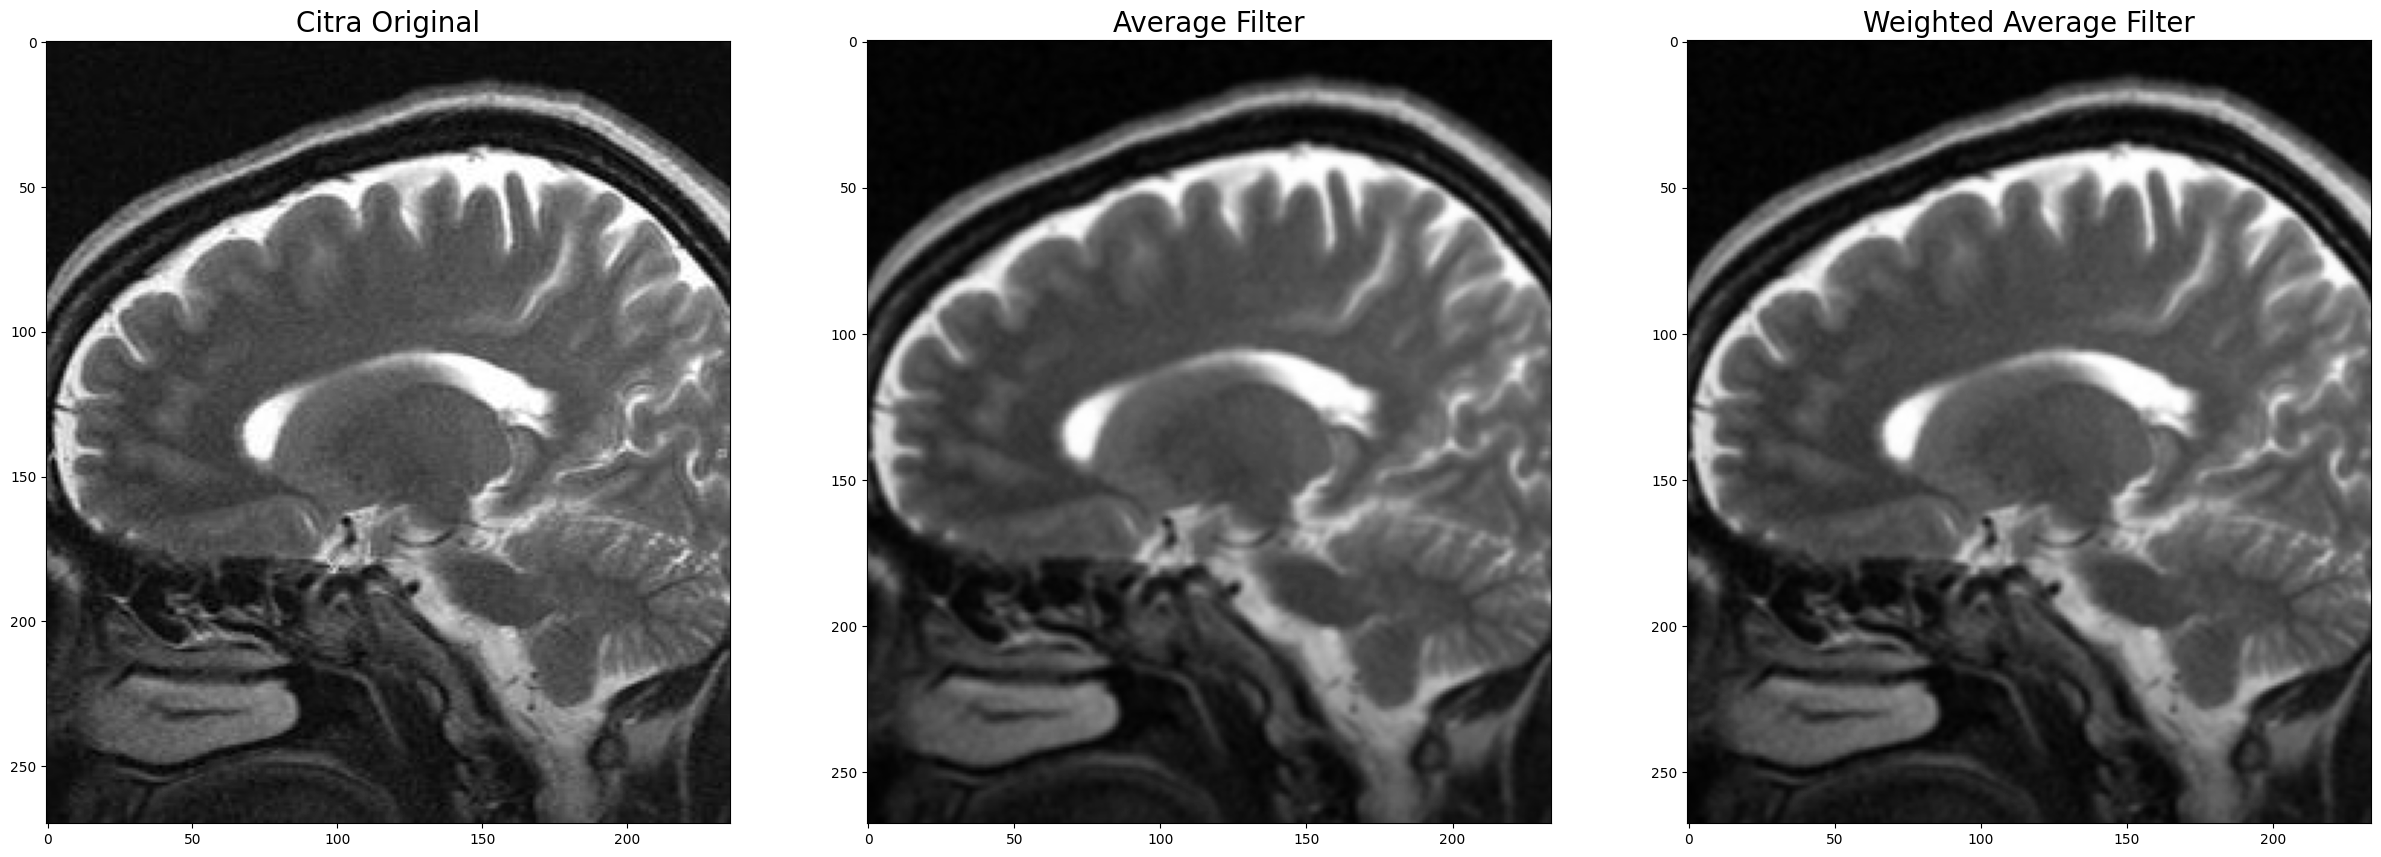

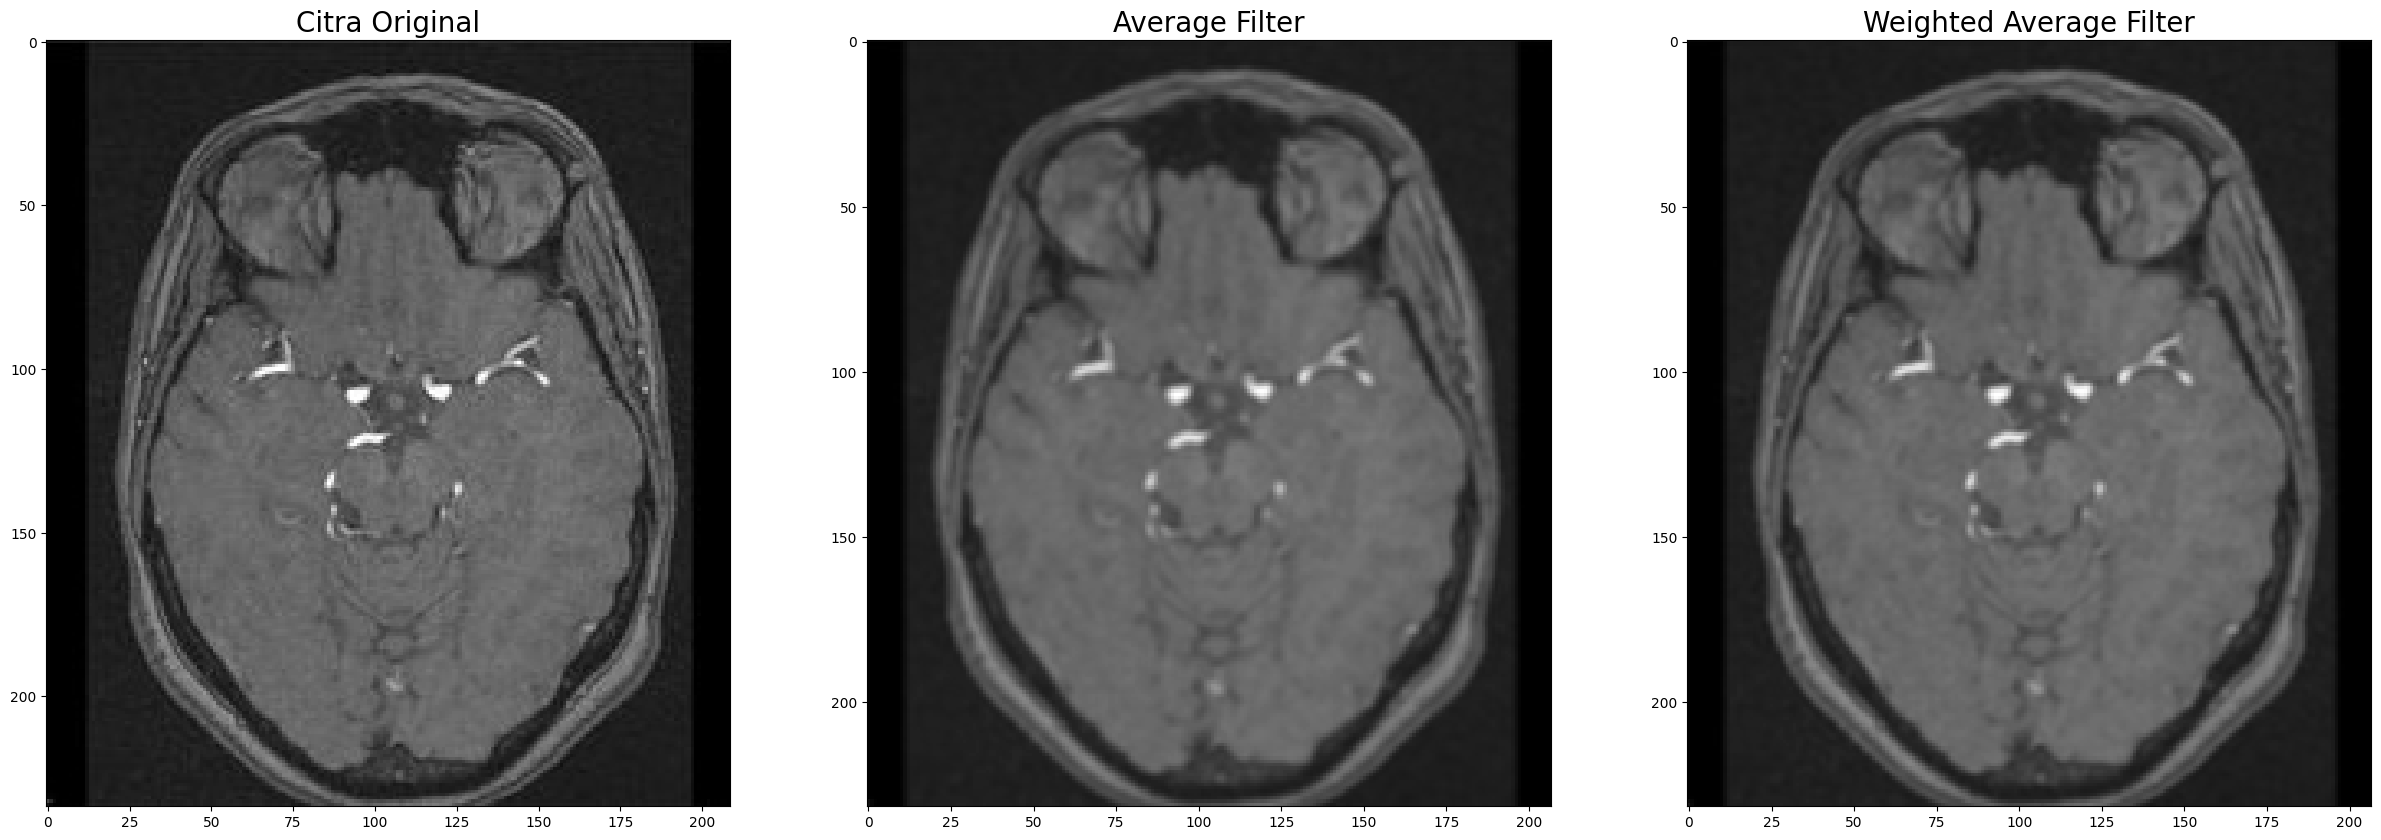

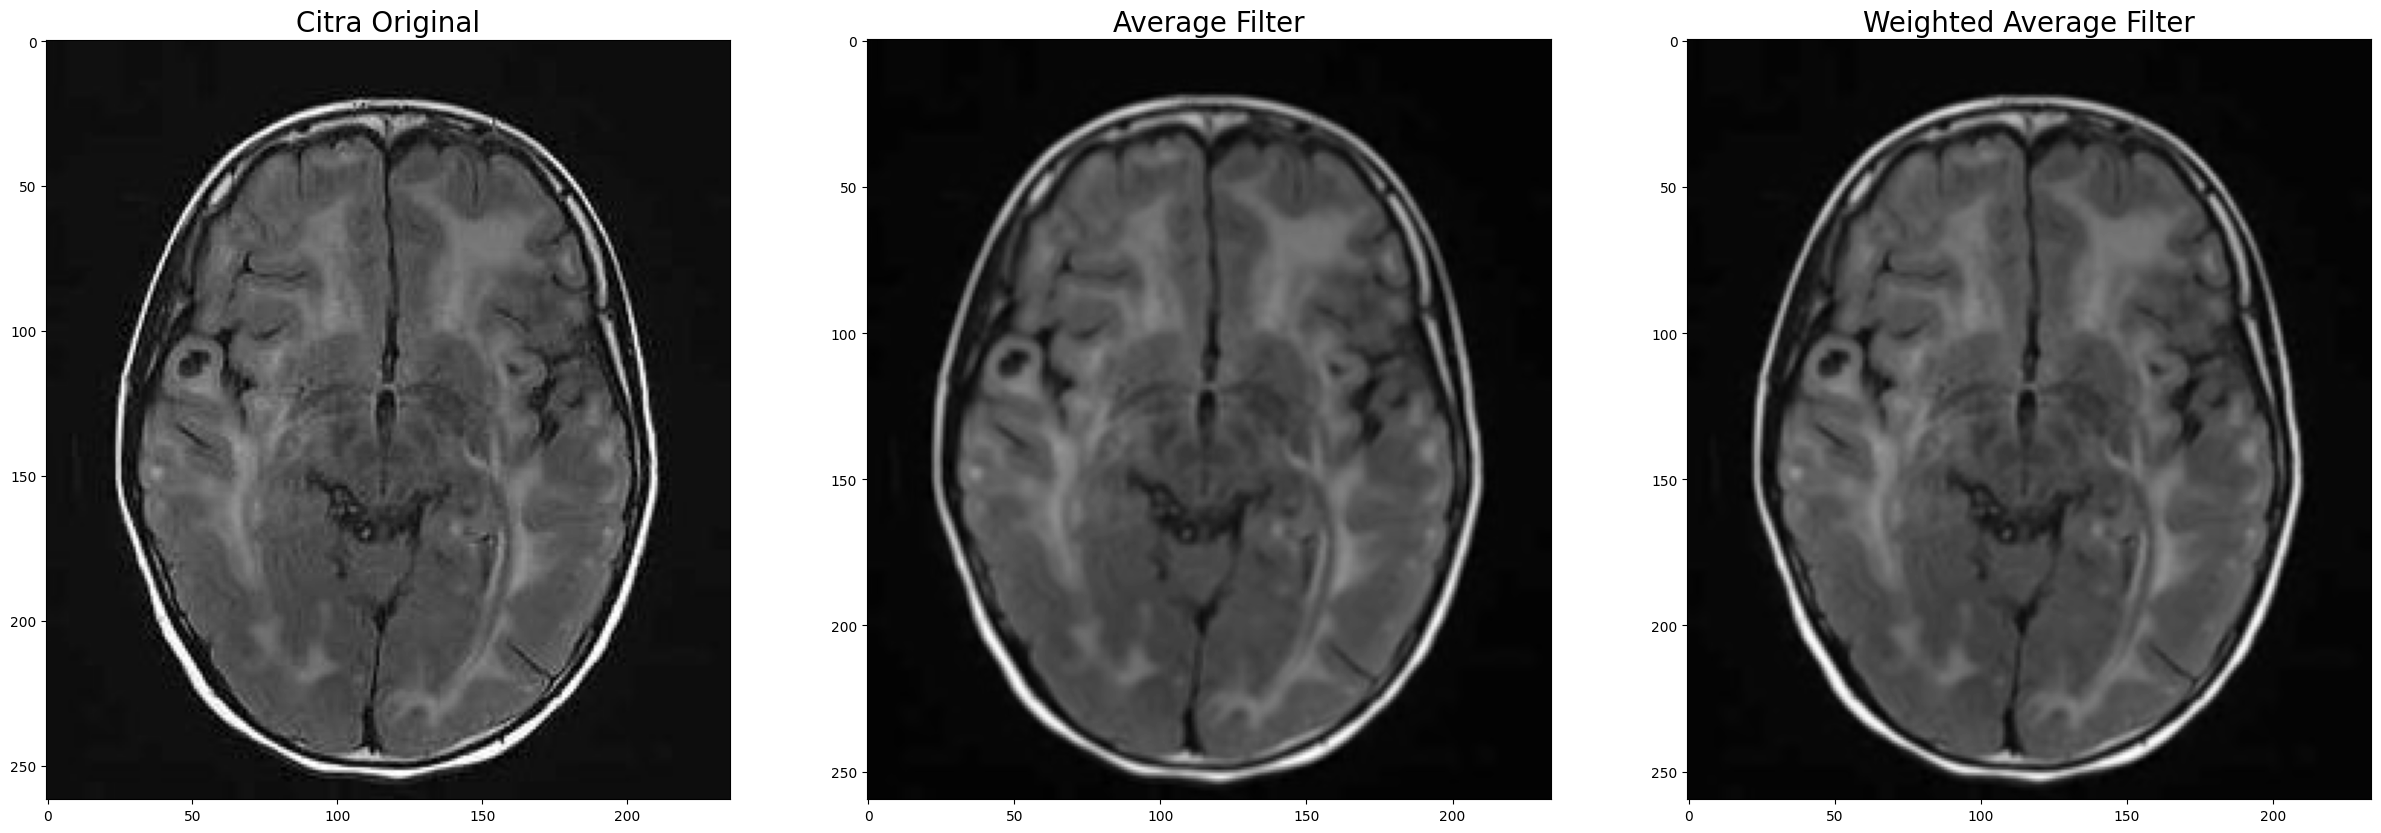

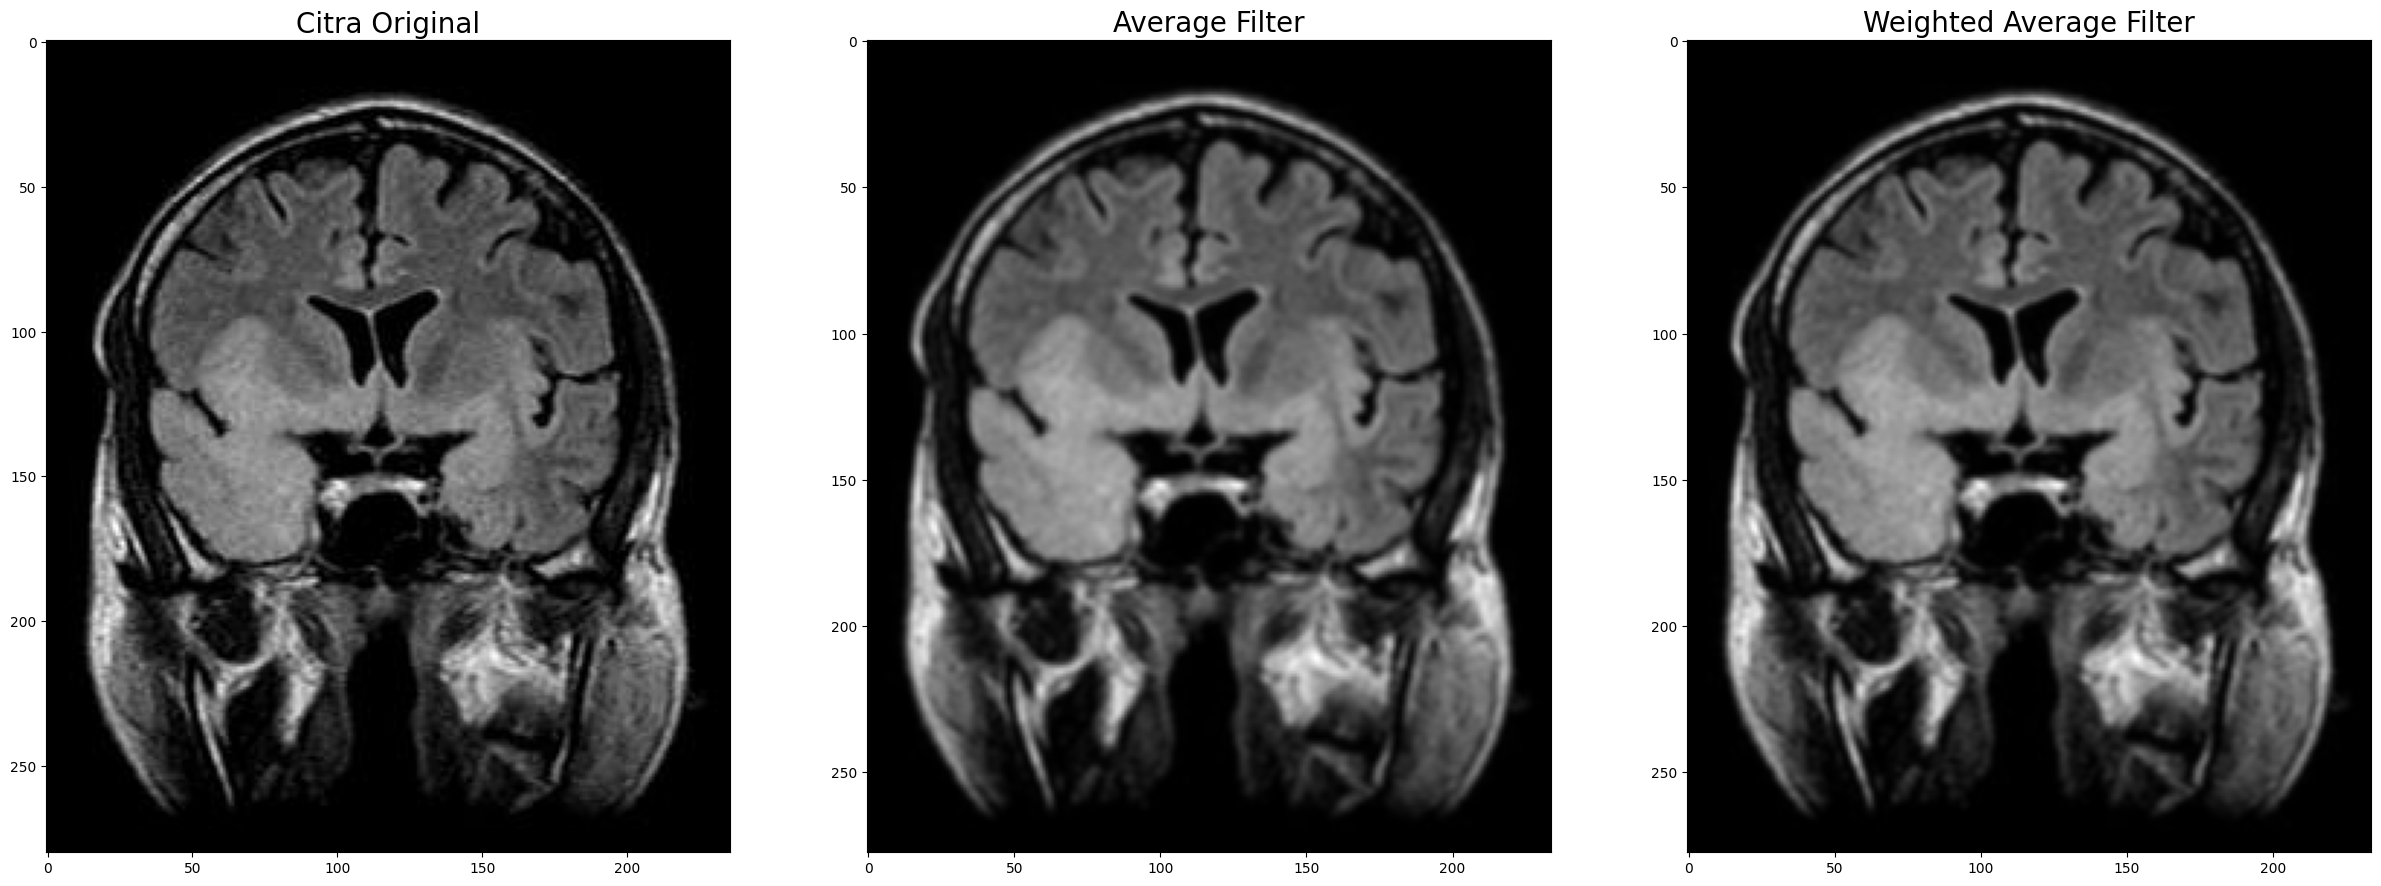

In [ ]:
average_filter(brain1)
average_filter(brain2)
average_filter(brain3)
average_filter(brain4)
average_filter(brain5)

## Median Filter

In [ ]:
#fungsi untuk menggunakan median filter dengan ukuran kernel 3x3
def medianFilter(input_image):
  img = cv2.imread(input_image, 0)
  w,h = img.shape
  k = 3
  size = k // 2

  # Buat output image dengan nilai awal nol dan lakukan padding
  _img = np.zeros((w+2*size,h+2*size), dtype=float)
  _img[size:size+w,size:size+h] = img.copy().astype(float)
  dst = _img.copy()

  # Proses filtering
  for x in range(w):
    for y in range(h):
        dst[x+size,y+size] = np.median(_img[x:x+k,y:y+k])

  dst = dst[size:size+w,size:size+h].astype(np.uint8)
  return dst

Nilai SSIM: 0.8623028632075495


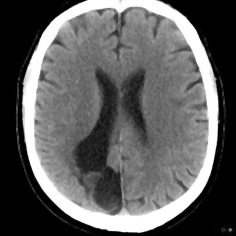

In [ ]:
# Tampilkan citra hasil Median Filter
img1= cv2.imread(brain1, cv2.IMREAD_GRAYSCALE)
img_median_filter = medianFilter(brain1)
img_median_filter = img_median_filter.astype(np.uint8)
img_median_filter = cv2.resize(img_median_filter, (img1.shape[1], img1.shape[0]))

ssim_score = ssim(img1, img_median_filter)
print("Nilai SSIM:", ssim_score)
cv2_imshow(img_median_filter)

Nilai SSIM: 0.9327395933635705


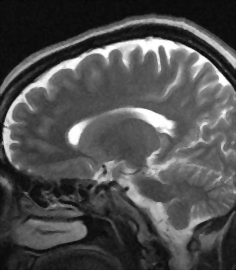

In [ ]:
# Tampilkan citra hasil Median Filter
img1= cv2.imread(brain2, cv2.IMREAD_GRAYSCALE)
img_median_filter = medianFilter(brain2)
img_median_filter = img_median_filter.astype(np.uint8)
img_median_filter = cv2.resize(img_median_filter, (img1.shape[1], img1.shape[0]))

ssim_score = ssim(img1, img_median_filter)
print("Nilai SSIM:", ssim_score)
cv2_imshow(img_median_filter)

Nilai SSIM: 0.9268408735348224


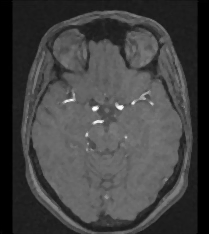

In [ ]:
# Tampilkan citra hasil Median Filter
img3= cv2.imread(brain3, cv2.IMREAD_GRAYSCALE)
img_median_filter = medianFilter(brain3)
img_median_filter = img_median_filter.astype(np.uint8)
img_median_filter = cv2.resize(img_median_filter, (img3.shape[1], img3.shape[0]))

ssim_score = ssim(img3, img_median_filter)
print("Nilai SSIM:", ssim_score)
cv2_imshow(img_median_filter)

Nilai SSIM: 0.9413559055513725


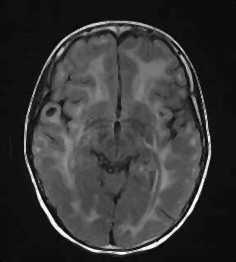

In [ ]:
# Tampilkan citra hasil Median Filter
img4= cv2.imread(brain4, cv2.IMREAD_GRAYSCALE)
img_median_filter = medianFilter(brain4)
img_median_filter = img_median_filter.astype(np.uint8)
img_median_filter = cv2.resize(img_median_filter, (img4.shape[1], img4.shape[0]))

ssim_score = ssim(img4, img_median_filter)
print("Nilai SSIM:", ssim_score)
cv2_imshow(img_median_filter)

Nilai SSIM: 0.9594849237392498


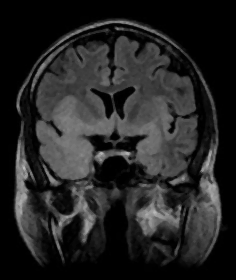

In [ ]:
# Tampilkan citra hasil Median Filter
img5= cv2.imread(brain5, cv2.IMREAD_GRAYSCALE)
img_median_filter = medianFilter(brain5)
img_median_filter = img_median_filter.astype(np.uint8)
img_median_filter = cv2.resize(img_median_filter, (img5.shape[1], img5.shape[0]))

ssim_score = ssim(img5, img_median_filter)
print("Nilai SSIM:", ssim_score)
cv2_imshow(img_median_filter)